In [37]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

In [38]:
url = "http://socialblade.com/youtube/"

In [39]:
html = requests.get(url)

In [40]:
print html.text[:500]

<!DOCTYPE html>
<head>
<title>Track YouTube analytics, future predictions, & live subscriber counts - Social Blade</title>
<meta name="description" content="View the daily YouTube analytics, track progress charts, view future predictions, related channels, and track realtime live sub counts.">
<meta name="keywords" content="YouTube statistics, YouTube analytics, daily statistics, daily graphs, YouTube users, top youtubers, top YouTube users, top YouTube networks, top charts, YouTube networks, ap


In [41]:
print type(html)

<class 'requests.models.Response'>


In [42]:
soup = BeautifulSoup(html.text)

In [49]:
body = soup.findAll("div", {"class": "table-body"})

In [58]:
def prepare_table_row(row):
    """
    Take the raw table data and send it to a dictionary
    """
    lst = [i.text for i in row if i !=u'\n']
    return dict(rank=int(lst[0]),
                grade=str(lst[1]),
                channel=str(lst[2]),
                videos=float(lst[3].replace(",", "")),
                subscribers=float(lst[4].replace(",", "")),
                views=float(lst[5].replace(",","")))

In [61]:
print prepare_table_row(body[0])

{'subscribers': 61831275.0, 'videos': 3459.0, 'views': 17461530176.0, 'grade': 'A', 'channel': 'PewDiePie', 'rank': 1}


In [62]:
data = []
for tr in body:
    datum = prepare_table_row(tr)
    for a in tr.find_all('a', href=True):
        datum['url'] = a['href']
    data.append(datum)

In [63]:
df = pd.DataFrame(data)

In [64]:
df

,channel,grade,rank,subscribers,url,videos,views
0,PewDiePie,A,1,61831275.0,/youtube/user/pewdiepie,3459.0,1.746153e+10
1,T-Series,A++,2,40564266.0,/youtube/user/tseries,12194.0,3.460975e+10
2,Justin Bieber,B,3,38056122.0,/youtube/user/kidrauhl,132.0,5.827884e+08
3,JustinBieberVEVO,A,4,34651188.0,/youtube/user/JustinBieberVEVO,123.0,1.714674e+10
4,HolaSoyGerman.,B+,5,33551527.0,/youtube/user/holasoygerman,137.0,3.448900e+09
5,Canal KondZilla,A++,6,30442399.0,/youtube/user/CanalKondzilla,679.0,1.484931e+10
6,Ed Sheeran,A+,7,29417715.0,/youtube/user/EdSheeran,116.0,1.274125e+10
7,Rihanna,B-,8,29032030.0,/youtube/user/Rihanna,69.0,5.322299e+07
8,Dude Perfect,D-,9,28782821.0,/youtube/user/corycotton,173.0,4.930189e+09
9,elrubiusOMG,A,10,28471491.0,/youtube/user/ElRubiusOMG,767.0,6.413027e+09


In [65]:
import seaborn as sns

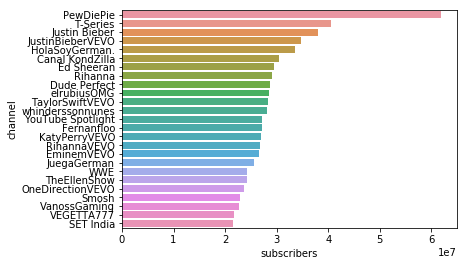

In [66]:
ax = sns.barplot(x=df["subscribers"], y=df["channel"])

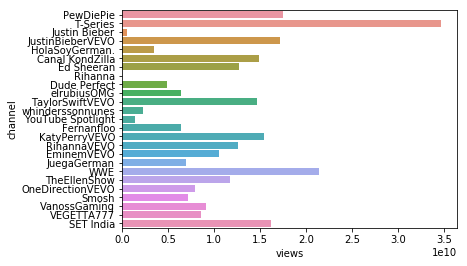

In [67]:
ax = sns.barplot(x=df["views"], y=df["channel"])

In [68]:
import wikipedia

In [69]:
print wikipedia.search("T-Series")

[u'T-Series', u'ThinkPad T Series', u'T series', u'Isuzu Giga', u'T-series (Toronto subway)', u'List of Canon products', u'Gulshan Kumar', u'Apple-designed processors', u'ThinkPad', u'SPARC T-Series']


In [70]:
print wikipedia.summary("T-Series", sentences=5)

T-Series is an Indian music company, founded by Gulshan Kumar in the 1980s. It is primarily known for Bollywood music soundtracks. It is also engaged in film production and distribution.
In the 1990s, T-Series released many of the best-selling Bollywood soundtrack albums, including Nadeem–Shravan's Aashiqui (1990), the best-selling Indian soundtrack album of all time. Currently, the T-Series YouTube channel is the most-viewed YouTube channel in the world, with nearly 1.7 billion monthly views, as of December 2017.


In [72]:
for index, row in df.iterrows():
    print wikipedia.summary(row['channel'], sentences=5)
    print "\n"

Felix Arvid Ulf Kjellberg ( SHEL-burg; Swedish: [ˈfeːlɪks ²ɕɛlːˌbærj] ( listen); born 24 October 1989), known online as PewDiePie ( PEW-dee-py), is a Swedish YouTube personality, web-based comedian and video producer. He is known for his Let's Play commentaries and vlogs, as well as his following on YouTube.
Born in Gothenburg, Sweden, PewDiePie originally pursued a degree in industrial economics and technology management at Chalmers University of Technology. In 2010, during his time at the university, he registered a YouTube account under the name PewDiePie. The following year, he dropped out of Chalmers after becoming disinterested with his degree field, much to the dismay of his parents.


T-Series is an Indian music company, founded by Gulshan Kumar in the 1980s. It is primarily known for Bollywood music soundtracks. It is also engaged in film production and distribution.
In the 1990s, T-Series released many of the best-selling Bollywood soundtrack albums, including Nadeem–Shravan'

Katheryn Elizabeth Hudson (born October 25, 1984), known professionally as Katy Perry, is an American singer, songwriter, and television judge. After singing in church during her childhood, she pursued a career in gospel music as a teenager. Perry signed with Red Hill Records and released her debut studio album Katy Hudson under her birth name in 2001, which was commercially unsuccessful. She moved to Los Angeles the following year to venture into secular music after Red Hill ceased operations and she subsequently began working with producers Glen Ballard, Dr. Luke, and Max Martin.


Robyn Rihanna Fenty (; 20 February 1988) is a Bajan-born singer, songwriter and actress. Born in Saint Michael, Barbados and raised in Bridgetown, during 2003 she recorded demo tapes under the direction of record producer Evan Rogers and signed a recording contract with Def Jam Recordings after auditioning for its then-president, hip hop producer and rapper Jay Z. In 2005, Rihanna rose to fame with the rel